## Case: Does the weather have an influence on the punctuality of trains ??


In [48]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


### Data exploratie

In [2]:
# Importing librairies
import numpy as np
import pandas as pd

# Loading the first dataset
dataset1 = pd.read_csv('Dataset I - Punctuality.csv')
dataset1.head()


,Datum,Punctuality,Uitval
0,06-07-2008,91.024860,2.057339
1,07-07-2008,87.288559,1.797290
2,08-07-2008,89.441957,1.308944
3,09-07-2008,82.830959,1.800605
4,10-07-2008,80.569308,1.493777


In [3]:
 
print('Weather dataset dimensions:', dataset1.shape)

Weather dataset dimensions: (1974, 3)


In [4]:
# Loading the second dataset
dataset2 = pd.read_csv('Dataset II - Weather.csv')
dataset2.head()

,Datum,Dag.Max..windstoot..km.u.,DagMax..Sneeuw..cm.,DagMax..Windkracht..bft.,DagMax.Neerslag..mm.uur.,DagMin.Temp..1.5m..C.
0,01-01-2002,46.7,0.3,5,0.7,-4.2
1,02-01-2002,43.2,0.0,5,0.0,-6.8
2,03-01-2002,46.7,0.0,5,0.0,-5.9
3,04-01-2002,39.6,0.0,5,0.0,-9.9
4,05-01-2002,32.4,0.0,4,0.0,-10.3


In [5]:
 
print('Punctualiteit dataset dimensions:', dataset2.shape)

Punctualiteit dataset dimensions: (4383, 6)


In [6]:
# Display a description of the dataset
display(dataset2.describe())

,Dag.Max..windstoot..km.u.,DagMax..Sneeuw..cm.,DagMax..Windkracht..bft.,DagMax.Neerslag..mm.uur.,DagMin.Temp..1.5m..C.
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000
mean,51.276067,0.081086,5.099703,2.883596,4.510221
std,16.316686,0.427672,1.104473,4.423841,6.096608
min,18.000000,0.000000,2.000000,0.000000,-21.800000
25%,39.600000,0.000000,4.000000,0.000000,0.200000
50%,46.700000,0.000000,5.000000,1.300000,4.900000
75%,61.100000,0.000000,6.000000,3.900000,9.200000
max,136.700000,6.800000,10.000000,64.400000,18.400000


In [7]:
# Merging the datasets to have one

dataset_improved = dataset1.merge(dataset2, on='Datum', how='left')

dataset_improved.head()
                      

,Datum,Punctuality,Uitval,Dag.Max..windstoot..km.u.,DagMax..Sneeuw..cm.,DagMax..Windkracht..bft.,DagMax.Neerslag..mm.uur.,DagMin.Temp..1.5m..C.
0,06-07-2008,91.024860,2.057339,61.1,0.0,5,3.0,12.4
1,07-07-2008,87.288559,1.797290,68.3,0.0,6,6.3,12.3
2,08-07-2008,89.441957,1.308944,68.3,0.0,6,14.4,11.3
3,09-07-2008,82.830959,1.800605,61.1,0.0,6,10.4,10.5
4,10-07-2008,80.569308,1.493777,50.3,0.0,5,10.0,13.9


In [8]:
print('dataset_improved dimensions:', dataset_improved.shape)

dataset_improved dimensions: (1974, 8)


### Observation:
 *There are two output variables but we are going to predict one: puctuality,
 
 *There are five predictors,
 
 *One predictor has its value as an integer while other predictors' values are float.
 


#### My intuition??
Yes, the weather has in influence on the punctuality of trains. The temperature for instance:

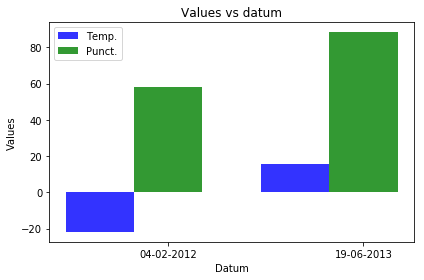

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#Data
n_groups = 2
DagMinTemp = (-21.8, 15.8)
Punctualiteit = (57.92, 88.20)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, DagMinTemp, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Temp.')

rects2 = plt.bar(index + bar_width, Punctualiteit, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Punct.')

plt.xlabel('Datum')
plt.ylabel('Values')
plt.title('Values vs datum')
plt.xticks(index + bar_width, ('04-02-2012', '19-06-2013'))
plt.legend()
 
plt.tight_layout()
plt.show()
 

#### Analyse

In [11]:
# What about the other predictors?
X_data = dataset_improved.iloc[:,3:]
X_data.head()

,Dag.Max..windstoot..km.u.,DagMax..Sneeuw..cm.,DagMax..Windkracht..bft.,DagMax.Neerslag..mm.uur.,DagMin.Temp..1.5m..C.
0,61.1,0.0,5,3.0,12.4
1,68.3,0.0,6,6.3,12.3
2,68.3,0.0,6,14.4,11.3
3,61.1,0.0,6,10.4,10.5
4,50.3,0.0,5,10.0,13.9


In [49]:
from sklearn.cross_validation import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

new_data = X_data.copy()
new_raw = new_data['DagMin.Temp..1.5m..C.']
new_data.drop(['DagMin.Temp..1.5m..C.'], axis=1, inplace = True)
#new_data.head()

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, new_raw, test_size=0.25, random_state=0)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

#Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print (score)

0.051096230176050805


Samenvatting

The variable 'DagMin.Temp..1.5m..C ..' does affect the punctuality of the transport. coefficient of determination is 0.0511 meaning only 5.11% of the variations of the y-values is eliminated by the regression model and 94.89% has remained and that is too much much. It is then clearly still valuable to the prediction.



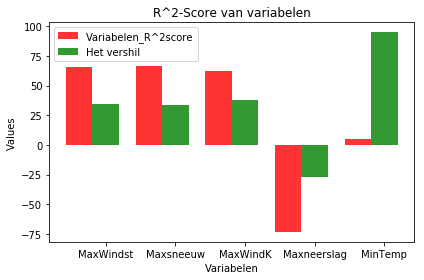

In [13]:
#Other wariables
import numpy as np
import matplotlib.pyplot as plt

#Data
n_groups = 5
Variabelen_R2score= (65.46, 66.22,61.97,-73.26,5.22)
Verschil = (34.54, 33.75, 38.03, -26.74, 94.78)

#DagMaxWindst = (65.46)
#DagMaxsneeuw = (66.22)
#DagMaxWindK = (61.97)
#DagMaxneerslag = (-73.26)
#DagMinTemp = (-21.8, 15.8)


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.38
opacity = 0.8

rects1 = plt.bar(index, Variabelen_R2score, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Variabelen_R^2score')

rects2 = plt.bar(index + bar_width, Verschil, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Het vershil')


plt.xlabel('Variabelen')
plt.ylabel('Values')
plt.title('R^2-Score van variabelen')
plt.xticks(index + bar_width, ('MaxWindst', 'Maxsneeuw', 'MaxWindK', 'Maxneerslag', 'MinTemp'))
plt.legend()
 
plt.tight_layout()
plt.show()
 

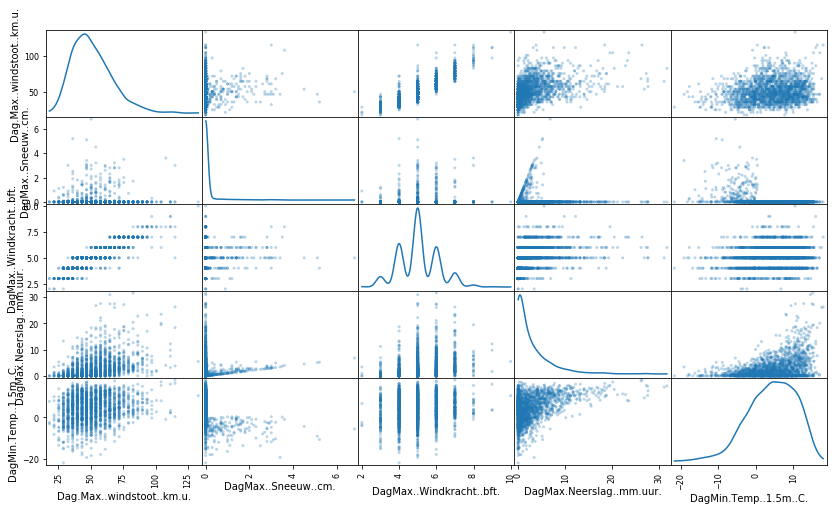

In [15]:
#If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others.
# Scatter matrix
pd.plotting.scatter_matrix(X_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

This does confirm my suspicion about the relevance of ‘DagMin.Temp..1.5..C’ feature: it does not show any degree of correlation with other features and is therefore necessary for indentifying customers' spending habits as explained above.

In [16]:
X_data.corr()

,Dag.Max..windstoot..km.u.,DagMax..Sneeuw..cm.,DagMax..Windkracht..bft.,DagMax.Neerslag..mm.uur.,DagMin.Temp..1.5m..C.
Dag.Max..windstoot..km.u.,1.000000,0.057649,0.882273,0.443229,0.188521
DagMax..Sneeuw..cm.,0.057649,1.000000,0.058263,-0.010146,-0.342607
DagMax..Windkracht..bft.,0.882273,0.058263,1.000000,0.339043,0.134671
DagMax.Neerslag..mm.uur.,0.443229,-0.010146,0.339043,1.000000,0.398704
DagMin.Temp..1.5m..C.,0.188521,-0.342607,0.134671,0.398704,1.000000


### Variables preprocessing


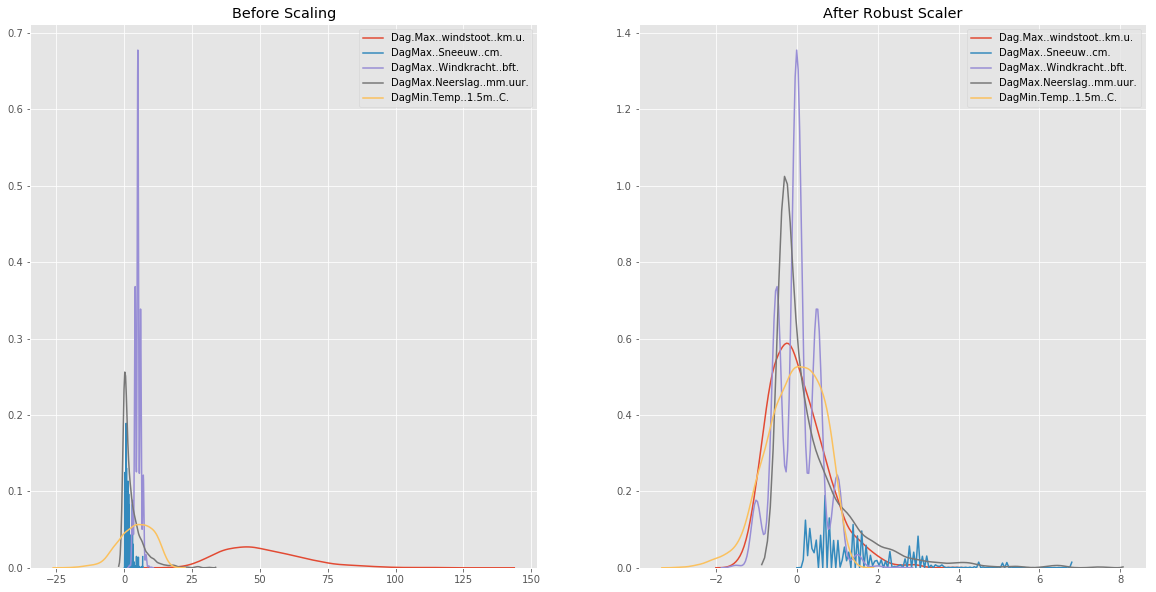

In [18]:
#Scaling
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')


df = X_data
#df.head()

scaler = preprocessing.RobustScaler()

scaled_df = scaler.fit_transform(df)
#type(scaled_df)
scaled_df = pd.DataFrame(scaled_df, columns=['Dag.Max..windstoot..km.u.', 'DagMax..Sneeuw..cm.', 'DagMax..Windkracht..bft.', 'DagMax.Neerslag..mm.uur.', 'DagMin.Temp..1.5m..C.'])
#scaled_df.head()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

ax1.set_title('Before Scaling')
sns.kdeplot(df['Dag.Max..windstoot..km.u.'], ax=ax1)
sns.kdeplot(df['DagMax..Sneeuw..cm.'], ax=ax1)
sns.kdeplot(df['DagMax..Windkracht..bft.'], ax=ax1)
sns.kdeplot(df['DagMax.Neerslag..mm.uur.'], ax=ax1)
sns.kdeplot(df['DagMin.Temp..1.5m..C.'], ax=ax1)

ax2.set_title('After Robust Scaler')
sns.kdeplot(scaled_df['Dag.Max..windstoot..km.u.'], ax=ax2)
sns.kdeplot(scaled_df['DagMax..Sneeuw..cm.'], ax=ax2)
sns.kdeplot(scaled_df['DagMax..Windkracht..bft.'], ax=ax2)
sns.kdeplot(scaled_df['DagMax.Neerslag..mm.uur.'], ax=ax2)
sns.kdeplot(scaled_df['DagMin.Temp..1.5m..C.'], ax=ax2)
plt.show()

In [52]:
scaled_df.head()

,Dag.Max..windstoot..km.u.,DagMax..Sneeuw..cm.,DagMax..Windkracht..bft.,DagMax.Neerslag..mm.uur.,DagMin.Temp..1.5m..C.
0,0.502326,0.0,0.0,0.400,0.817204
1,0.837209,0.0,0.5,1.225,0.806452
2,0.837209,0.0,0.5,3.250,0.698925
3,0.502326,0.0,0.5,2.250,0.612903
4,0.000000,0.0,0.0,2.150,0.978495


In [53]:

scaled_df.corr()

,Dag.Max..windstoot..km.u.,DagMax..Sneeuw..cm.,DagMax..Windkracht..bft.,DagMax.Neerslag..mm.uur.,DagMin.Temp..1.5m..C.
Dag.Max..windstoot..km.u.,1.000000,0.057649,0.882273,0.443229,0.188521
DagMax..Sneeuw..cm.,0.057649,1.000000,0.058263,-0.010146,-0.342607
DagMax..Windkracht..bft.,0.882273,0.058263,1.000000,0.339043,0.134671
DagMax.Neerslag..mm.uur.,0.443229,-0.010146,0.339043,1.000000,0.398704
DagMin.Temp..1.5m..C.,0.188521,-0.342607,0.134671,0.398704,1.000000


## Outliers detection



In [54]:
X = scaled_df
#X[:4]
#X.head()
X.shape
#type(X)

(1974, 5)

In [55]:
#Interquartile Range(IQR) 


Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Dag.Max..windstoot..km.u.    1.0
DagMax..Sneeuw..cm.          0.0
DagMax..Windkracht..bft.     1.0
DagMax.Neerslag..mm.uur.     1.0
DagMin.Temp..1.5m..C.        1.0
dtype: float64


In [26]:
#The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.
print(X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))

      Dag.Max..windstoot..km.u.  DagMax..Sneeuw..cm.  \
0                         False                False   
1                         False                False   
2                         False                False   
3                         False                False   
4                         False                False   
5                         False                False   
6                         False                False   
7                         False                False   
8                         False                False   
9                         False                False   
10                        False                False   
11                        False                False   
12                        False                False   
13                        False                False   
14                        False                False   
15                        False                False   
16                        False                F

TypeError: Could not compare [None] with block values

Consulion:
No outliers in de dataset

In [27]:
## Y scaling
Y= dataset_improved.iloc[:,1:2].values
Y



array([[91.02485967],
       [87.28855857],
       [89.44195709],
       ...,
       [84.04992962],
       [68.15677583],
       [89.36249501]])

In [28]:
# Y data
y = (Y/100)
#df.head()

y

array([[0.9102486 ],
       [0.87288559],
       [0.89441957],
       ...,
       [0.8404993 ],
       [0.68156776],
       [0.89362495]])

## Implementing models


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#X = dataset_improved.iloc[:,3:].values #not getting all the variables
X = scaled_df
#X[:4]


In [30]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.20)

In [31]:
X_train.shape

(1579, 5)

In [32]:
y_train.shape

(1579, 1)

In [33]:
X_test.shape

(395, 5)

In [34]:
y_test.shape

(395, 1)

In [50]:
#Since it is a regression we are going to import regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor



regressorDT = DecisionTreeRegressor(random_state = 0, max_depth=4)
regressorAB = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), random_state=np.random.RandomState(0))
regressorGB = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls')


dt_fitDT=regressorDT.fit(X_train, y_train)
dt_fitAB=regressorAB.fit(X_train, y_train)
dt_fitGB=regressorGB.fit(X_train, y_train)

 #Predict label on the test set
y_predictDT = regressorDT.predict(X_test)
y_predictAB = regressorAB.predict(X_test)
y_predictGB = regressorGB.predict(X_test)


        

In [36]:
#Evaluation Metric
# 1.Mean Squared Error
from sklearn.metrics import mean_squared_error

print("mean_sqared_error_DecisionTree: {}".format(mean_squared_error(y_test, regressorDT.predict(X_test))))
print("mean_sqared_error_AdaBoosting: {}".format(mean_squared_error(y_test, regressorAB.predict(X_test))))
print("mean_sqared_error_GradientBoosting: {}".format(mean_squared_error(y_test, regressorGB.predict(X_test))))

mean_sqared_error_DecisionTree: 0.0029478698034454175
mean_sqared_error_AdaBoosting: 0.0038636094073759633
mean_sqared_error_GradientBoosting: 0.002954002855534769


In [37]:
# 2. Mean Absolute error
from sklearn.metrics import mean_absolute_error

print("mean_absolute_error_DecisionTree: {}".format(mean_absolute_error(y_test,regressorDT.predict(X_test))))
print("mean_absolute_error_AdaBoosting: {}".format(mean_absolute_error(y_test,regressorAB.predict(X_test))))
print("mean_absolute_error_GradientBoosting: {}".format(mean_absolute_error(y_test,regressorGB.predict(X_test))))



mean_absolute_error_DecisionTree: 0.03748041956654684
mean_absolute_error_AdaBoosting: 0.04747489331598223
mean_absolute_error_GradientBoosting: 0.036785396088069355


In [38]:
#Features importance
print("DecisionTree_feature_importance: {}".format(dt_fitDT.feature_importances_))
print("AdaBoosting_feature_importance: {}".format(dt_fitAB.feature_importances_))
print("GRadientBoosting_feature_importance: {}".format(dt_fitGB.feature_importances_))
#dt_fitDT.feature_importances_

DecisionTree_feature_importance: [0.30524786 0.13047936 0.01836821 0.04871686 0.4971877 ]
AdaBoosting_feature_importance: [0.19424416 0.13518109 0.09713854 0.14783288 0.42560333]
GRadientBoosting_feature_importance: [0.29 0.2  0.08 0.04 0.39]


In [39]:
y_predictDT[:5]
#y_predictAB[:5]
#y_predictGB[:5]

array([0.89113279, 0.89113279, 0.89113279, 0.89113279, 0.89113279])

In [40]:
y_test[:5]

array([[0.91509997],
       [0.90607348],
       [0.89504815],
       [0.90116605],
       [0.87253673]])

## Linear Regression model

In [41]:
#Since it is a regression we are going to import regressor

from sklearn.linear_model import LinearRegression


regressor = LinearRegression()

dt_fit=regressor.fit(X_train, y_train)
#dt_fit

 #Predict label on the test set
y_predict = regressor.predict(X_test)

#Ckeck the score
#regressor.score(X_test, y_test)
        

In [43]:
#Get the intercept, C (the mean of the response, Y, when all predictors, all X = 0.)

#regressor.intercept_
print('Estimated intercept coefficient:',(regressor.intercept_))

Estimated intercept coefficient: [0.88504087]


In [44]:
#Evaluation Metric
# 1.Mean Squared Error
from sklearn.metrics import mean_squared_error

print("mean_sqared_error: {}".format(mean_squared_error(y_test, regressor.predict(X_test))))


mean_sqared_error: 0.0028601940132318075


In [45]:
# 2. Mean Absolute error
from sklearn.metrics import mean_absolute_error

print("mean_absolute_error: {}".format(mean_absolute_error(y_test,regressor.predict(X_test))))



mean_absolute_error: 0.037437731636636565


In [46]:
regressor.predict(X_test)[:5] # Predict unkown data

array([[0.91211615],
       [0.89979345],
       [0.90329896],
       [0.87913756],
       [0.88872703]])

In [47]:
y_test[:5]

array([[0.91509997],
       [0.90607348],
       [0.89504815],
       [0.90116605],
       [0.87253673]])